In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

Wir benutzen die ``loadtxt`` Methode von numpy um die Koinzidenzen pro Stunde aus der Datei <Cosmics/cosmics_GSI_mar2017_0deg.txt> zu lesen

In [14]:
monateJahr = "mar2017"
Winkel = 0
coinc = np.loadtxt("Cosmics/cosmics_GSI_mar2017_" + str(Winkel) +"deg.txt")

Wir wollen ein Bin für jede Häufigkeit, deshalb geben wir die Bins ein statt ``bins='auto'`` zu benutzen.

(array([0., 0., 0., 0., 1., 0., 1., 1., 3., 0., 1., 5., 3., 1., 2., 0., 3.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
        36., 37., 38., 39., 40., 41., 42., 43., 44.]),
 <a list of 34 Patch objects>)

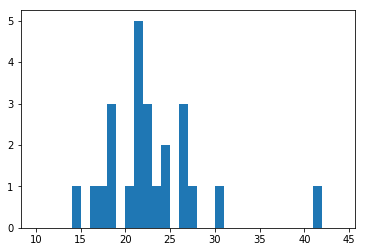

In [15]:
plt.hist(coinc, np.arange(10.,45.,1.))

In [16]:
from scipy.stats import norm
import matplotlib.mlab as mlab

In [17]:
(mu, sigma) = norm.fit(coinc)

print("Mittelwert: " + str(round(mu,2)) + '   Abweichung: ' + str(round(sigma,2)))

Mittelwert: 22.46   Abweichung: 5.34


Noch einfacher, wenn man die methoden von ``numpy.array`` benutzt:

In [18]:
print("Mittelwert: " + str(round(coinc.mean(),2)) + "    Abweichung: " + str(round(coinc.std(),2)))

Mittelwert: 22.46    Abweichung: 5.34


Stimmt das? Wir rechnen Mittelwert und Abweichung manuell um zu bestätigen:

In [20]:
mittelwert = np.sum(coinc)/coinc.size
abweichung = np.sqrt(np.sum(np.power(coinc-mittelwert,2))/coinc.size)

print("Mittelwert: " + str(round(mittelwert,2)) + "    Abweichung: " + str(round(abweichung,2)))

Mittelwert: 22.46    Abweichung: 5.34


Wir histogrammieren nochmal die Häufigkeitsverteilung und fügen die Gaußsche Normalverteilung hinzu, die sie am besten genügt. Dafür benutzen wir ``scipy.optimize``.

In [21]:
bin_heights, bin_borders, _ = plt.hist(coinc, np.arange(0.,50.,1.), facecolor='green', alpha=0.75)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
from scipy.optimize import curve_fit
def gaussian(x, mean, amplitude, stddev):
    return amplitude * np.exp( - ((x - mean) / stddev) ** 2)
#popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[22.,2.,5.])
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 100)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')

plt.xlabel('Koinzidenzen pro Stunde')
plt.ylabel(u'Häufigkeit')
plt.title(r'$\mathrm{H\"aufigkeitsverteilunghistogramm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()

Wir schreiben den Winkel und den entsprechenden Mittelwert in einer Datei.

In [23]:
with open("Cosmics/cosmics_GSI_" + monateJahr + ".txt", 'w') as out_file:
    out_file.write(str(round(Winkel)) + "   " + str(round(mu,2)) + "   " + str(round(sigma,2)))

Wenn wir Winkel, Mittelwert von Koinzidenzen pro Stunde und Abweichung für alle Winkel in einer Datei geschrieben haben, dann können wir Koinzidenzen-pro-Stunde vs. Winkel plotten und mit einer Funktion der Form
$\alpha \cdot cos^\beta \theta$
fitten.

In [50]:
w, mw, aw  = np.loadtxt("Cosmics/cosmics_GSI_" + monateJahr + ".txt", usecols = (0,3,4), unpack=True)

Text(0.02,0.08,u'fit function: $\\alpha \\cdot cos^\\beta \\theta$\n$\\alpha = $21.643  $\\beta =$ 2.643')

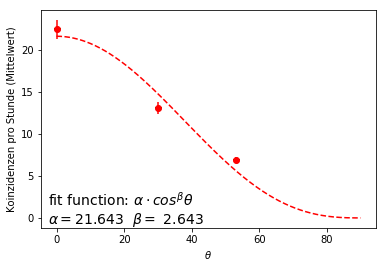

In [51]:
from scipy import optimize
plt.errorbar(w, mw, xerr=0.1, yerr=aw, fmt='ro')
plt.xlabel(r'$\theta$')
plt.ylabel('Koinzidenzen pro Stunde (Mittelwert)')
#np.seterr(all='warn', over='ignore')
# In der foldgenden fitfunc 'x' ist der Winkel in Graden, p der Array von zwei Parametern
fitfunc = lambda p, x: p[0] * np.power(np.cos(2.*np.pi/360. * x), p[1])
#fitfunc = lambda p, x: p[0] * np.power(np.cos(2.*np.pi/360. * x), 2.7)
errfunc = lambda p, x, y: np.abs(fitfunc(p, x) - y) # Distance to the target function
p0 = [22., 2.5] # Initial guess for the parameters
#p0 = [1., 2.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(w, mw))
points = np.linspace(0.,90.,1000)
plt.plot(w, mw, "g*", points, fitfunc(p1, points), "r--")
ax = plt.axes()
plt.text(0.02, 0.08,
       # 'Plotting with $\alpha * \cos^{\beta}\theta$\n$\alpha = $%.3f  $\beta = $%.3f' % (1/p1[0],1/p1[0]),
         r"fit function: $\alpha \cdot cos^\beta \theta$"'\n'r"$\alpha = $%.3f  $\beta =$ %.3f" % (p1[0],p1[1]),
         fontsize=14,
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes)